In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
boston = load_boston()

In [ ]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(boston.data.shape)

(506, 13)


In [ ]:
bos=pd.DataFrame(boston.data)
print(bos.head(2))

        0     1     2    3      4   ...   8      9     10     11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.9  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.9  9.14

[2 rows x 13 columns]


In [ ]:
print(boston.feature_names)
bos.columns = boston.feature_names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
bos['PRICE']=boston.target
print(bos.shape)

(506, 14)


In [ ]:
Y = bos['PRICE']
X = bos.drop('PRICE',axis=1)
print(Y.head(5))
print(X.head(5))

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [ ]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.3,random_state=5)

In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [ ]:
df = pd.DataFrame(Y_test_pred,Y_test)
df.head(5)

,0
PRICE,
37.6,37.389977
27.9,31.567942
22.6,27.133739
13.8,6.551176
35.2,33.693108


In [ ]:
mse = mean_squared_error(Y_test,Y_test_pred)
print(mse)

30.697037704088636


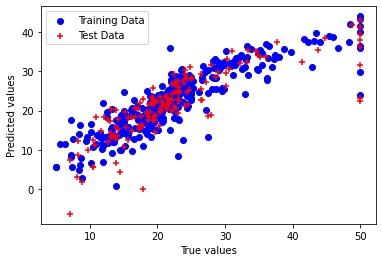

In [ ]:
plt.scatter(Y_train,Y_train_pred,c='blue',marker='o',label='Training Data')
plt.scatter(Y_test,Y_test_pred,c='red',marker='+',label='Test Data')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot()
plt.show()

In [ ]:
import pickle

In [ ]:
with open('model_pickle','wb') as f:
  pickle.dump(model,f)